# Prediction of the success of a bank marketing campaign

This notebook predicts the success of a bank marketing campaign. The program has been divided into two sections : EDA and the ML algorithm.

### 1. Importing important libraries

In [ ]:
import numpy as np                           #For calculations
import matplotlib.pyplot as plt              #For making graphs
import pandas as pd                          #For operations on dataframes
import seaborn as sns                        #For making graphs with better visualizations

### 2. Reading the data

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank_ritika.csv to bank_ritika.csv


The **feature** variables in the dataset include:

1.   age (Age): Indicates th age of the person
2.   job (Job): Indicates the profession of the person
3. marital (Marital Status): Indicates if the person is married.
4. education (Educational Level): Indicates the educational qualification of the person
5. default (Default status): Indicates if the person has credit in default.
6.  balance (Balance): Indicates the bank balance
7.  housing (Housing Loan Status): Indicates if the person has a housing loan
8. loan (Personal Loan Status): Indicates if the person has a personal loan
9. contact (Mode of contact): Indicates the mode of contact
9. day (Last contact day): Indicates the last contact day of the week
10. month (Last contact month): Indicates the last contact month of the year
11. duration (Last contact duration): Indicates the duration of the last contact in seconds
12. campaign (Number of contacts): Indicates the number of contacts performed during this campaign and for this client
13. pdays (Number of days that passed by after the client was last contacted from a previous campaign)
14. previous (Number of contacts performed before this campaign and for this client)
15. poutcome (Outcome of the previous marketing campaign)

The **target** variable is y.



In [ ]:
df=pd.read_csv('bank_ritika.csv',sep=',')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10245,53,management,married,tertiary,no,2578,no,no,cellular,19,nov,299,4,107,2,failure,no
3728,29,student,single,secondary,no,658,no,no,cellular,15,jul,198,2,244,4,other,yes
9773,77,retired,married,secondary,no,2123,no,no,telephone,4,feb,141,4,-1,0,unknown,no
10284,29,technician,married,secondary,no,-910,yes,no,cellular,21,jul,260,1,-1,0,unknown,no
6817,29,student,single,secondary,no,110,yes,no,unknown,7,may,169,3,-1,0,unknown,no
1744,29,management,single,tertiary,no,36252,yes,no,cellular,30,apr,501,1,-1,0,unknown,yes
7676,46,blue-collar,married,primary,no,-388,yes,yes,cellular,10,jul,207,1,-1,0,unknown,no
5886,45,blue-collar,single,secondary,no,615,yes,no,cellular,15,may,133,1,-1,0,unknown,no
9831,51,blue-collar,married,primary,no,4497,yes,no,unknown,15,may,276,3,-1,0,unknown,no
3182,36,management,single,tertiary,no,479,no,no,cellular,9,feb,629,2,-1,0,unknown,yes


### 3. Preprocessing the data

In [ ]:
df.shape

(11162, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There are no missing values in the data. However, there are quite a few 'unknown'. We remove the rows that contain such values.

#### 3.a. Removing missing ('unknown/other') values

In [ ]:
# Deleting the rows in which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df2 = df.drop(df[condition].index, axis = 0, inplace = False)

In [ ]:
# Deleting rows in which column 'education' and 'job' contains 'unknown'
col = ['education','job']
for column in col:
  condition = df2[column] == 'unknown'
  df2 = df2.drop(df2[condition].index, axis = 0)

#### 3.b Removing outliers in continous data

In [ ]:
# Removing outliers based on zscore > 3 or zscore < -3
from scipy.stats import zscore

df2['balance_outliers'] = df2['balance']
df2['balance_outliers']= zscore(df2['balance_outliers']) #Creating an extra column with z scores and eliminating rows based on that

condition = (df2['balance_outliers']>3) | (df2['balance_outliers']<-3 )
df2 = df2.drop(df2[condition].index, axis = 0)

In [ ]:
df3=df2.drop('balance_outliers',axis=1)

#### 3.d. Other transformations

In [ ]:
# Changing the y column to binary

df4=pd.get_dummies(df3,columns=['y'])  #Performing one hot encoding and removing one y_no column
df4.drop('y_no',axis=1,inplace=True)
df4=df4.rename(columns={'y_yes':'response'})
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [ ]:
# Dropping column 'contact' which is not useful
df4.drop('contact',axis=1,inplace=True)

In [ ]:
#Converting 'duration' to minutes
df4['duration'] = df4['duration'].apply(lambda n:n/60).round(2)
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,59,admin.,married,secondary,no,2343,yes,no,5,may,17.37,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,5,may,24.45,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,23.15,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,5,may,9.65,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,11.22,2,-1,0,unknown,1


In [ ]:
#Encoding months to integers
df4['month'] = df4['month'].replace(to_replace=['jan','feb','mar','apr','may',
                                              'jun','jul','aug','sep','oct','nov','dec']
                                  , value=['1', '2','3','4','5','6','7','8','9',
                                           '10','11','12'])
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,59,admin.,married,secondary,no,2343,yes,no,5,5,17.37,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,5,5,24.45,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,5,5,23.15,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,5,5,9.65,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,5,5,11.22,2,-1,0,unknown,1


In [ ]:
# Dropping rows with duration <5s
condition = (df4['duration']<5/60)
df5 = df4.drop(df4[condition].index, axis = 0)


### 4. Exploratory Data Analysis

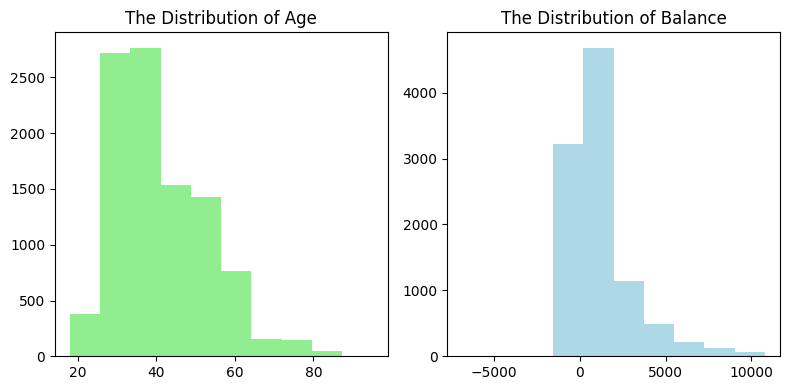

In [ ]:
# Visualizing distribution of 'age' and 'balance'
age_balance_dist = plt.figure(figsize = (8,4))

ax1 = age_balance_dist.add_subplot(1,2,1)
ax2 = age_balance_dist.add_subplot(1,2,2)

ax1.hist(df5['age'], color = 'lightgreen')
ax1.set_title('The Distribution of Age')

ax2.hist(df5['balance'], color = 'lightblue')
ax2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

The **distribution of age** shows that the majority of the customers lie in the range of 30-50 years. The standard deviation of the dataset is fairly small and the data is almost normally distributed.

The **distribution of balance** shows the varibality of the data as it ranges from -6847 to 10399, after we have removed the outliers. The standard deviation for the data is also quite high at 1708.

In [ ]:
df5.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000
mean,41.039710,1211.718206,15.629537,6.236709,2.515231,42.756409,0.664723,0.465769
std,11.695536,1792.877529,8.406127,5.859819,2.667973,100.602419,1.875012,0.498852
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,110.000000,8.000000,2.300000,1.000000,-1.000000,0.000000,0.000000
50%,38.000000,517.000000,15.000000,4.230000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1590.000000,21.500000,8.400000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,10787.000000,31.000000,64.680000,43.000000,854.000000,55.000000,1.000000


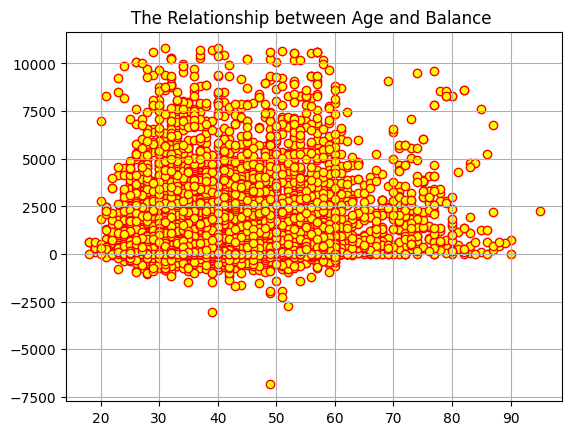

In [ ]:
# Visulizing relationship between age and balance

plt.figsize = (7,5)
plt.scatter(df5['age'],df5['balance'],c='yellow',edgecolor='red')
plt.grid(True)

plt.title('The Relationship between Age and Balance ')
plt.show()

The plot shows that there is no clear relationship between age and balance. However, we may note that **customers above 60 years tend to have a balance <5000**.

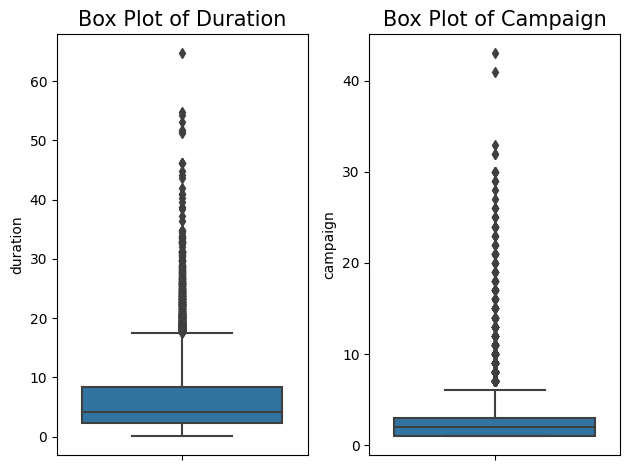

In [ ]:
# Visualizing the distribution of duration and campaign

plt.figsize = (10,6)
fig, axes = plt.subplots(1, 2)

sns.boxplot(y=df5['duration'],ax=axes[0])
sns.boxplot(y=df5['campaign'],ax=axes[1])

axes[0].set_title('Box Plot of Duration',size=15)
axes[1].set_title('Box Plot of Campaign',size=15)

plt.tight_layout()
plt.show()

The box plot of **duration** shows that most of the calls have been between 1.73 to 5.3 minutes. There are also quite a number of outliers exceeding 10 minutes. This might be an indication of interest shown by the customers in such cases.

The box plot of **campaign** iterates the fact that most customers have been contacted 1-2 times. However, even in this case, outliers exist which are as high as 58. This might be a special case.

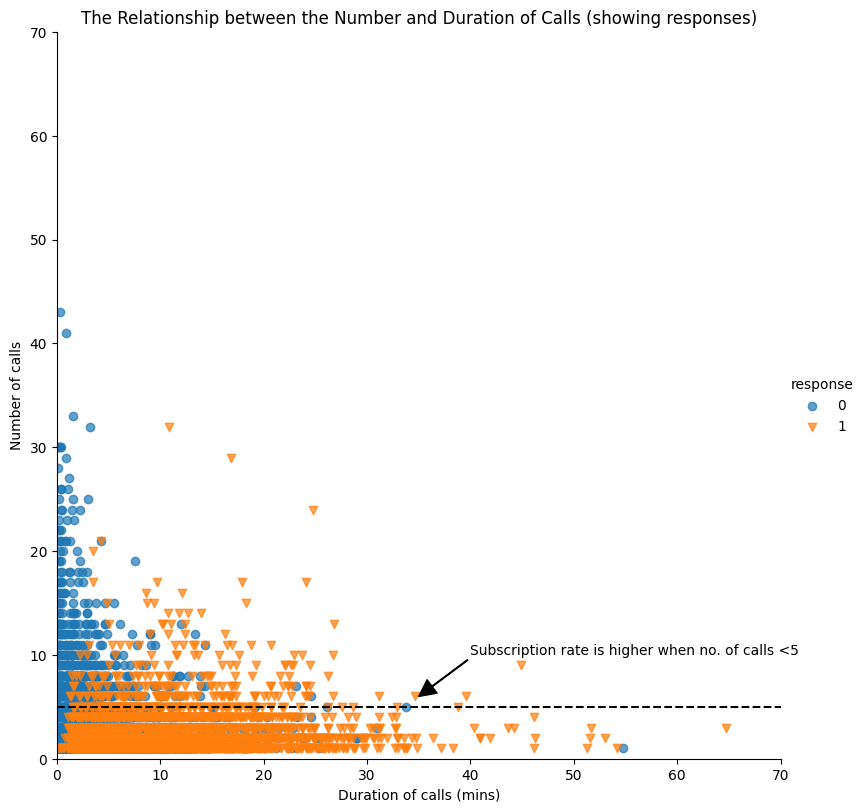

In [ ]:
# Visualizing the relationship between duration, number of calls and response
call_dur = sns.lmplot(x='duration', y='campaign',data = df5,
                     hue = 'response',markers =['o', 'v'],
                     scatter_kws={'alpha':0.7}, height =8,fit_reg = False)

plt.axis([0,70,0,70])
plt.title('The Relationship between the Number and Duration of Calls (showing responses)')
plt.xlabel('Duration of calls (mins)')
plt.ylabel('Number of calls')

# Annotation
plt.axhline(y=5, linewidth=1.5, color="k", linestyle='--')
plt.annotate('Subscription rate is higher when no. of calls <5',xytext = (40,10),
             arrowprops=dict(color = 'k', width=0.5),xy=(35,6))
plt.show()

The postive responses (marked in orange) show a **higher percentage when number of calls are lesser than 5**. High number of calls mostly receive a negative response. Hence, the bank should not try and contact a customer repeatedly as it has little positive outcome and adds to the customers irritation.

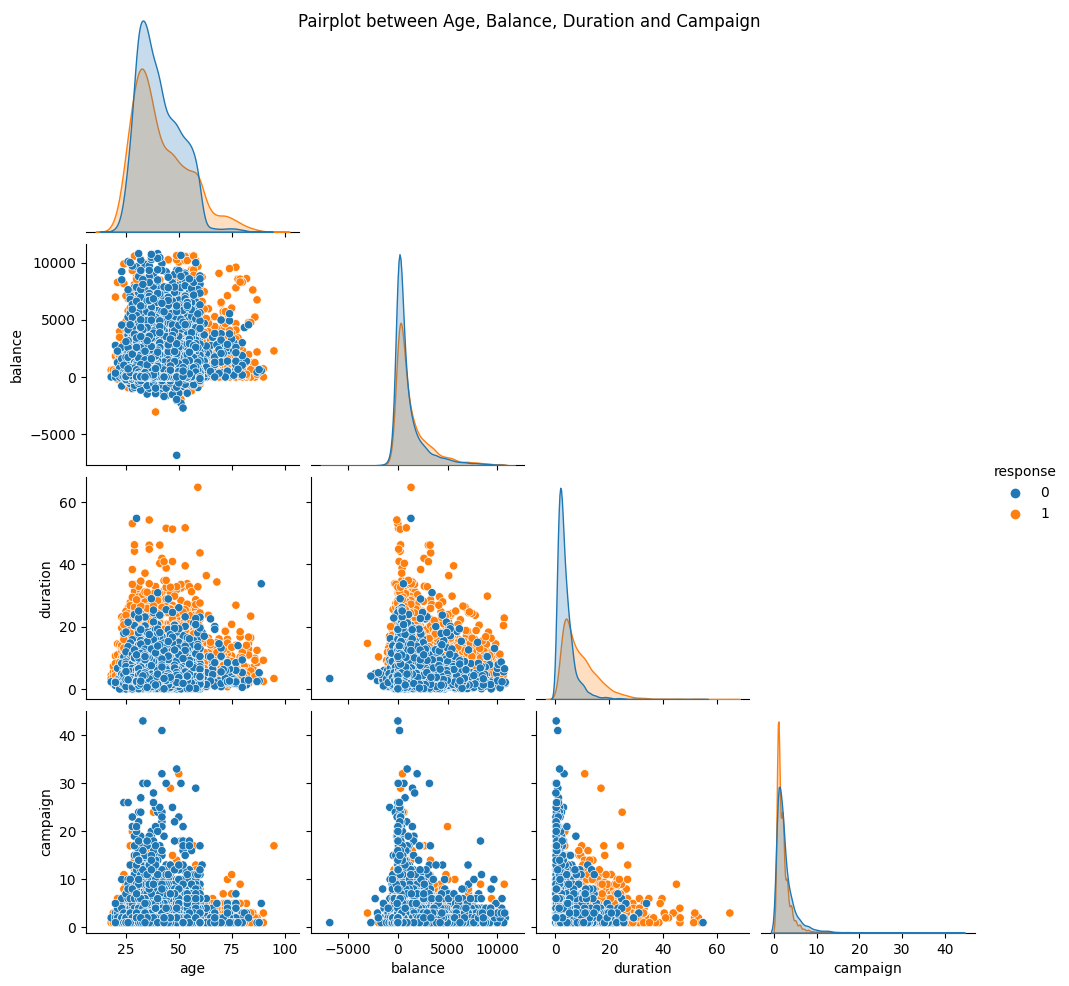

In [ ]:
# Plotting a pairplot between age, balance, duration and campaign
sns.pairplot(df5,x_vars=['age','balance','duration','campaign'],
             y_vars= ['age','balance','duration','campaign'],
             hue='response',corner=True)
plt.suptitle('Pairplot between Age, Balance, Duration and Campaign')

plt.show()

<ipython-input-22-76eccd3d480e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)


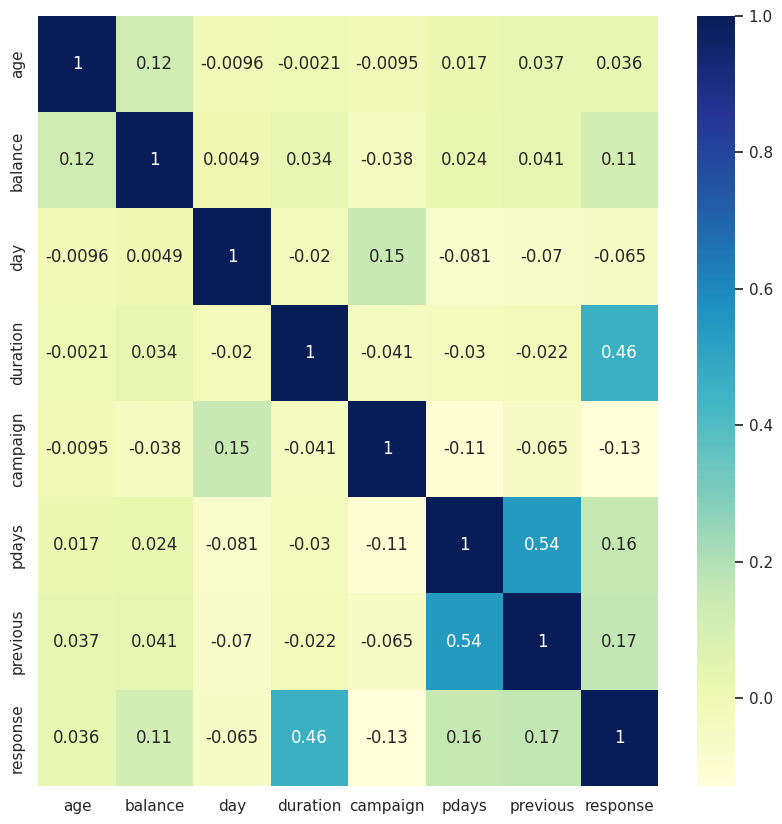

In [ ]:
# Plotting the heatmap for the variables

sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)
plt.show()

The pairplot does not bring out any significant trends with regards to a positive outcome of the campaign. For most of the variables, the positive outcome is fairly evenly spread out. However, only **lower number of calls** in previous campaigns ('campaign' variable) show a higher positive outcome.

From the heatmap of the variables, it is evident that only **duration** has a significant correlation with response.

### 5. Data Visualization

In [ ]:
# Visualizing the response with respect to age and percentage contacted
df_temp = df5.copy()
df_temp.loc[df_temp["age"] < 30,  'age group'] = 20
df_temp.loc[(df_temp["age"] >= 30) & (df_temp["age"] <= 39), 'age group'] = 30
df_temp.loc[(df_temp["age"] >= 40) & (df_temp["age"] <= 49), 'age group'] = 40
df_temp.loc[(df_temp["age"] >= 50) & (df_temp["age"] <= 59), 'age group'] = 50
df_temp.loc[df_temp["age"] >= 60, 'age group'] = 60
df_temp.sample(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age group
2105,29,management,single,tertiary,no,428,no,no,22,5,4.88,2,-1,0,unknown,1,20.0
5936,39,blue-collar,married,secondary,no,284,yes,yes,17,4,23.77,2,318,6,failure,0,30.0
824,42,technician,divorced,secondary,no,19,no,no,20,8,14.58,4,-1,0,unknown,1,40.0
2038,36,admin.,single,secondary,no,148,yes,no,15,5,22.62,4,374,2,failure,1,30.0
3343,53,admin.,married,secondary,no,1796,no,no,16,3,4.92,1,91,2,success,1,50.0
1853,57,admin.,married,secondary,no,6005,yes,no,8,5,11.73,1,323,6,failure,1,50.0
683,45,admin.,married,secondary,no,925,no,no,6,8,6.77,2,-1,0,unknown,1,40.0
10974,41,unemployed,married,primary,no,183,yes,no,29,7,4.52,1,-1,0,unknown,0,40.0
538,28,blue-collar,married,secondary,no,751,yes,no,22,7,9.97,5,-1,0,unknown,1,20.0
4429,23,technician,single,secondary,no,598,no,no,11,11,6.77,1,195,1,failure,1,20.0


In [ ]:
age_response_pct = pd.crosstab(df_temp['response'],
                               df_temp['age group']).apply(lambda x: x/x.sum() * 100)
age_response_pct = age_response_pct.transpose()
age_response_pct.columns=age_response_pct.columns.astype(str)
age_response_pct.rename(columns = {'0':'No', '1':'Yes'}, inplace = True)
age_response_pct

response,No,Yes
age group,,
20.0,41.154971,58.845029
30.0,56.415479,43.584521
40.0,60.273973,39.726027
50.0,58.573141,41.426859
60.0,23.183926,76.816074


In [ ]:
age = pd.DataFrame(df_temp['age group'].value_counts())
age['% Contacted'] = age['age group']*100/age['age group'].sum()
age['% Subscription'] = age_response_pct['Yes']
age.drop('age group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
age

,% Contacted,% Subscription,age
20.0,13.752890,58.845029,20
30.0,39.489293,43.584521,30
40.0,23.484468,39.726027,40
50.0,16.768875,41.426859,50
60.0,6.504474,76.816074,60


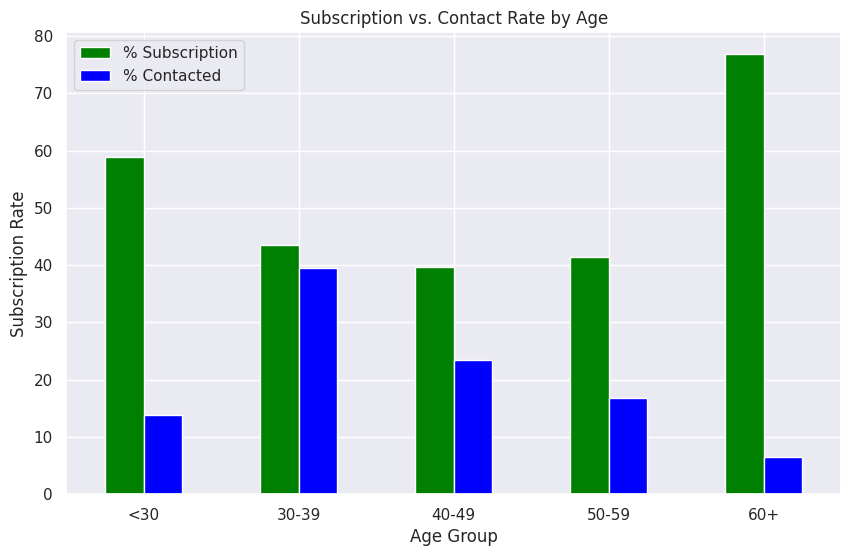

In [ ]:
age_plot = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(10,6), color = ('green','blue'))
plt.title('Subscription vs. Contact Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.show()

The percentage subscription is high among the young (<30) and old (60+) population. This may be because both these populations have a tendency of using a safe investment option.

In [ ]:
#Visualizing the effect of balance on response rate
df_temp.loc[df_temp["balance"] <= 0,  'balance group'] = 'no balance'
df_temp.loc[(df_temp["balance"] > 0) & (df_temp["balance"] <= 1000), 'balance group'] = 'low balance'
df_temp.loc[(df_temp["balance"] > 1000) & (df_temp["balance"] <= 5000), 'balance group'] = 'average balance'
df_temp.loc[(df_temp["balance"] > 5000), 'balance group'] = 'high balance'
df_temp.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age group,balance group
0,59,admin.,married,secondary,no,2343,yes,no,5,5,17.37,1,-1,0,unknown,1,50.0,average balance
1,56,admin.,married,secondary,no,45,no,no,5,5,24.45,1,-1,0,unknown,1,50.0,low balance
2,41,technician,married,secondary,no,1270,yes,no,5,5,23.15,1,-1,0,unknown,1,40.0,average balance
3,55,services,married,secondary,no,2476,yes,no,5,5,9.65,1,-1,0,unknown,1,50.0,average balance
4,54,admin.,married,tertiary,no,184,no,no,5,5,11.22,2,-1,0,unknown,1,50.0,low balance


In [ ]:
balance_response_pct = pd.crosstab(df_temp['response'],
                                   df_temp['balance group']).apply(lambda x: x/x.sum() * 100)
balance_response_pct = balance_response_pct.transpose()
balance_response_pct.columns=balance_response_pct.columns.astype(str)
balance_response_pct.rename(columns={'0':'No', '1':'Yes'},inplace=True)
balance_response_pct

response,No,Yes
balance group,,
average balance,45.933014,54.066986
high balance,43.486590,56.513410
low balance,55.447471,44.552529
no balance,65.710081,34.289919


In [ ]:
bal = pd.DataFrame(df_temp['balance group'].value_counts())
bal['% Contacted'] = bal['balance group']*100/bal['balance group'].sum()
bal['% Subscription'] = balance_response_pct['Yes']
bal.drop('balance group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)
bal

,% Contacted,% Subscription,bal
no balance,13.662411,34.289919,0
low balance,51.673872,44.552529,1
average balance,29.415904,54.066986,2
high balance,5.247813,56.513410,3


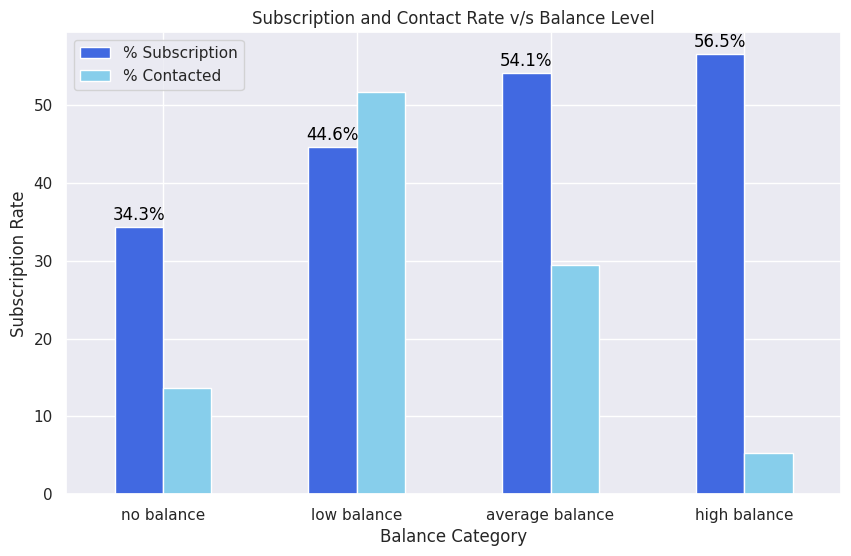

In [ ]:
balance_plot = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (10,6))

plt.title('Subscription and Contact Rate v/s Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# Annotation
for rec, label in zip(balance_plot.patches,
                      bal['% Subscription'].round(1).astype(str)):
    balance_plot.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')

The graph shows a higher percentage of positive response among the average balance category and low in the no balance category. Banks, henceforth, should target people woth average balance or high balance, instead of targeting those with low or no balance.

In [ ]:
df_temp.rename(columns={'response':'response_binary'},inplace=True)

In [ ]:
#Visualizing subscription rate of different balance levels
df_temp.loc[df_temp['response_binary'] == 1,  'response'] = 'yes'
df_temp.loc[df_temp['response_binary'] == 0,  'response'] = 'no'

balance_age1 = pd.DataFrame(df_temp.groupby(['age group','balance group'])['response_binary'].sum())
balance_age2 = pd.DataFrame(df_temp.groupby(['age group','balance group'])['response'].count())

balance_age1['response'] = balance_age2['response']
balance_age1['response_rate'] = balance_age1['response_binary']/ (balance_age1['response'])
balance_age1 = balance_age1.drop(['response_binary','response'],axis =1)

balance_age1 = balance_age1.unstack()

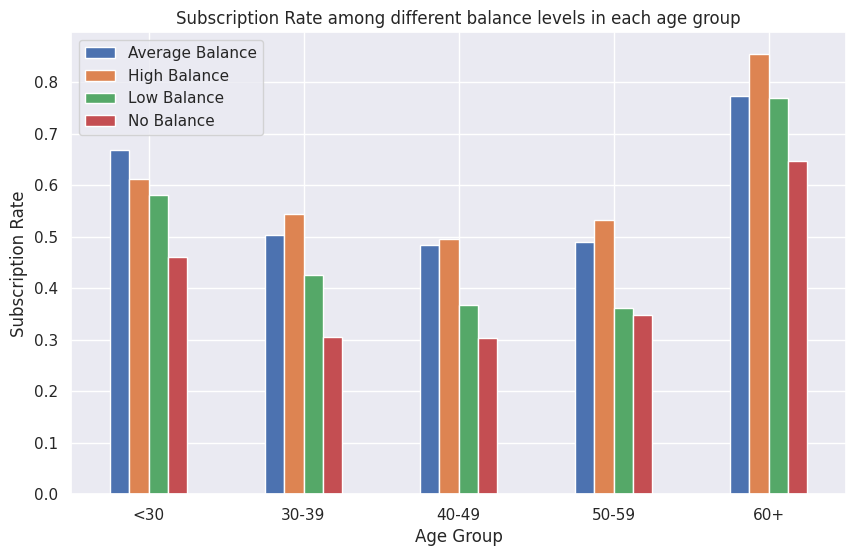

In [ ]:
bal_age = balance_age1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.title('Subscription Rate among different balance levels in each age group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.show()

High subsription rates were observed in the young (<30) and old (60+) population with average or high balances. Hence, banks should target this group for more positive outcomes in the future.

In [ ]:
# Visualizing subscription rate by job
job_response_pct = pd.crosstab(df_temp['response'],df_temp['job']).apply(lambda x: x/x.sum() * 100)
job_response_pct = job_response_pct.transpose()
job_response_pct

response,no,yes
job,,
admin.,53.497942,46.502058
blue-collar,63.584475,36.415525
entrepreneur,63.787375,36.212625
housemaid,60.236220,39.763780
management,50.547046,49.452954
retired,34.310850,65.689150
self-employed,55.248619,44.751381
services,60.616845,39.383155
student,21.923077,78.076923


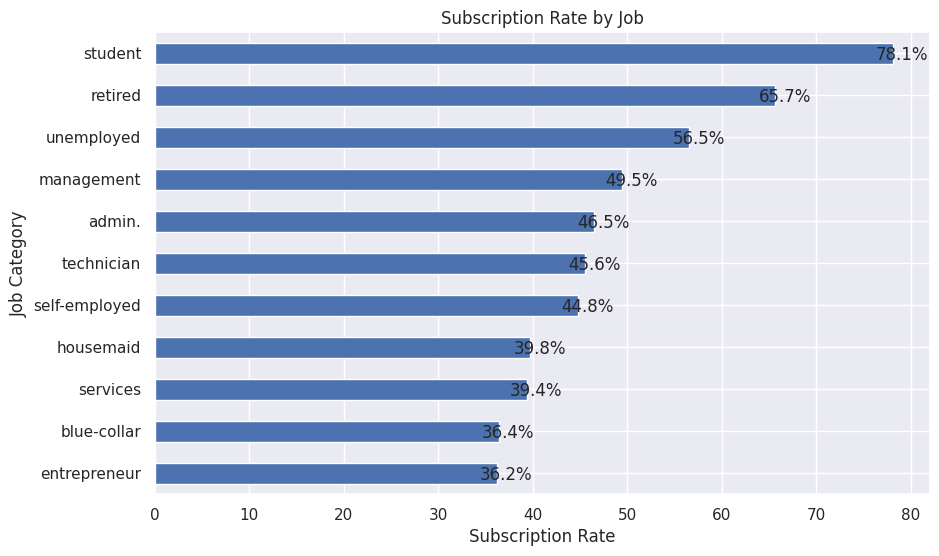

In [ ]:
job_plot = job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                            figsize = (10,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Annotation
for rec, label in zip(job_plot.patches,
                      job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    job_plot.text(rec.get_width()+1,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

As is evident from previous data, banks should target the student population and the retired professionals who stay away from complicated investments.

In [ ]:
# Visualizing subscription rate by month

month_response_pct = pd.crosstab(df_temp['response'],
                                 df_temp['month']).apply(lambda x: x/x.sum() * 100)
month_response_pct = month_response_pct.transpose()
month_response_pct

response,no,yes
month,,
1,57.295374,42.704626
10,17.629179,82.370821
11,57.297949,42.702051
12,7.058824,92.941176
2,42.113095,57.886905
3,9.053498,90.946502
4,37.341772,62.658228
5,67.786021,32.213979
6,56.327986,43.672014


In [ ]:
month = pd.DataFrame(df_temp['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

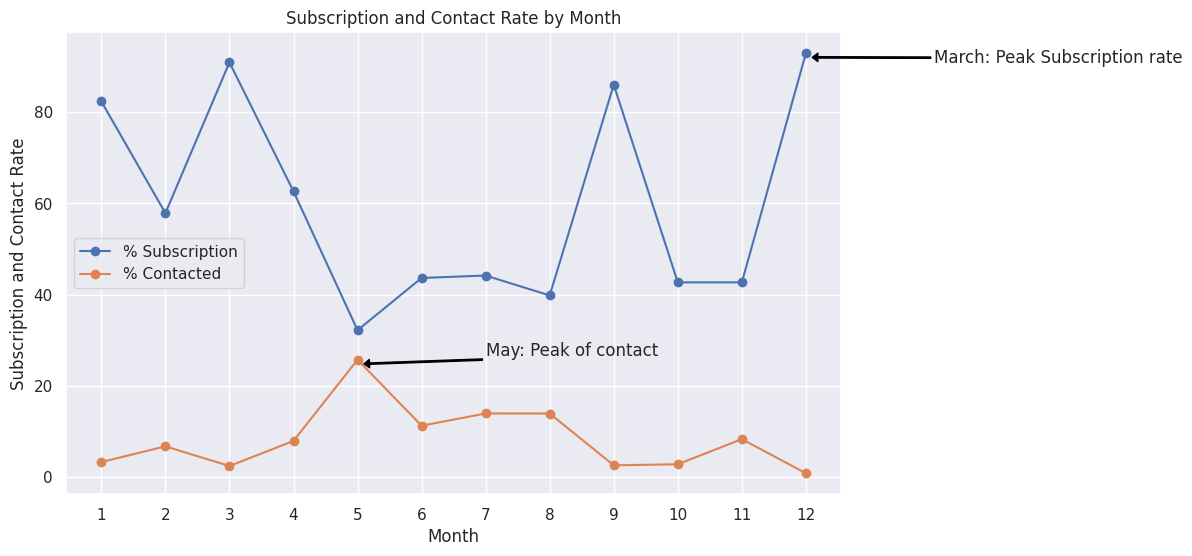

In [ ]:
month_plot = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription and Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks,np.arange(1,13,1))

# Annotation: Peak of contact
y = month['% Contacted'].max()
x = float(month['% Contacted'].idxmax())
plt.annotate('May: Peak of contact', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+4),
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'),
             horizontalalignment='left', verticalalignment='top')

# Annotation: Peak of subscription rate
y = month['% Subscription'].max()
x = float(month['% Subscription'].idxmax())
plt.annotate('March: Peak Subscription rate', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+1),
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'),
             horizontalalignment='left', verticalalignment='top')

plt.show()

The subscription rate and the number of contacted don't align completely. Hence, the banks should focus on March and September, October and lower the number of calls during the summer.

### 5. Machine Learning

Now, we build classification models to identify the best model for identifying the customers with maximum conversion rate.

In [ ]:
df5_copy=df5.copy()
df5_copy.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
1593,29,blue-collar,single,secondary,no,2,yes,yes,21,4,6.32,5,-1,0,unknown,1
4354,46,technician,married,secondary,no,332,yes,no,9,5,12.87,1,-1,0,unknown,1
6561,35,management,single,tertiary,no,1496,yes,no,22,8,1.22,4,-1,0,unknown,0
5451,39,entrepreneur,married,tertiary,no,2644,yes,no,20,5,4.22,1,-1,0,unknown,0
888,30,blue-collar,married,secondary,no,1664,yes,no,20,10,33.60,1,-1,0,unknown,1


Relevant customer information which affects the outcome shall be considered. These are age, job, balance, education, , default status, housing status and loan status.

In [ ]:
#Selecting required columns
df5_copy.drop(['marital'],axis=1, inplace=True)
df6 = df5_copy.iloc[:, 0:7]

In [ ]:
#Performing encoding of categorical variables
df7 = pd.get_dummies(df6, columns = ['job'])
df8 = pd.get_dummies(df7, columns = ['education'])
df8['housing'] = df8['housing'].map({'yes': 1, 'no': 0})
df8['default'] = df8['default'].map({'yes': 1, 'no': 0})
df8['loan'] = df8['loan'].map({'yes': 1, 'no': 0})
df_y = pd.DataFrame(df5_copy['response'])
df8 = pd.merge(df8, df_y, left_index = True, right_index = True)
df8.sample(5)

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response
6433,54,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4467,31,0,1766,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6667,44,0,275,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5906,45,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5729,36,0,806,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Selecting the model features
arr = df8.values

# Selecting first 20 columns as features
X = arr[:,0:-1]

# Selecting 'response' column as output
Y = arr[:,-1]

In [ ]:
# Importing modules for classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Splitting the data 80:20
m= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=m, random_state=seed)

In [ ]:
# Creating a list of models to find the best
models = []
models.append(('LR', LogisticRegression(max_iter= 200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
models

[('LR', LogisticRegression(max_iter=200)),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB())]

In [ ]:
# Fitting the data on the training set
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.627122 (0.021091)
KNN: 0.569189 (0.017638)
CART: 0.600482 (0.011003)
NB: 0.613294 (0.022558)


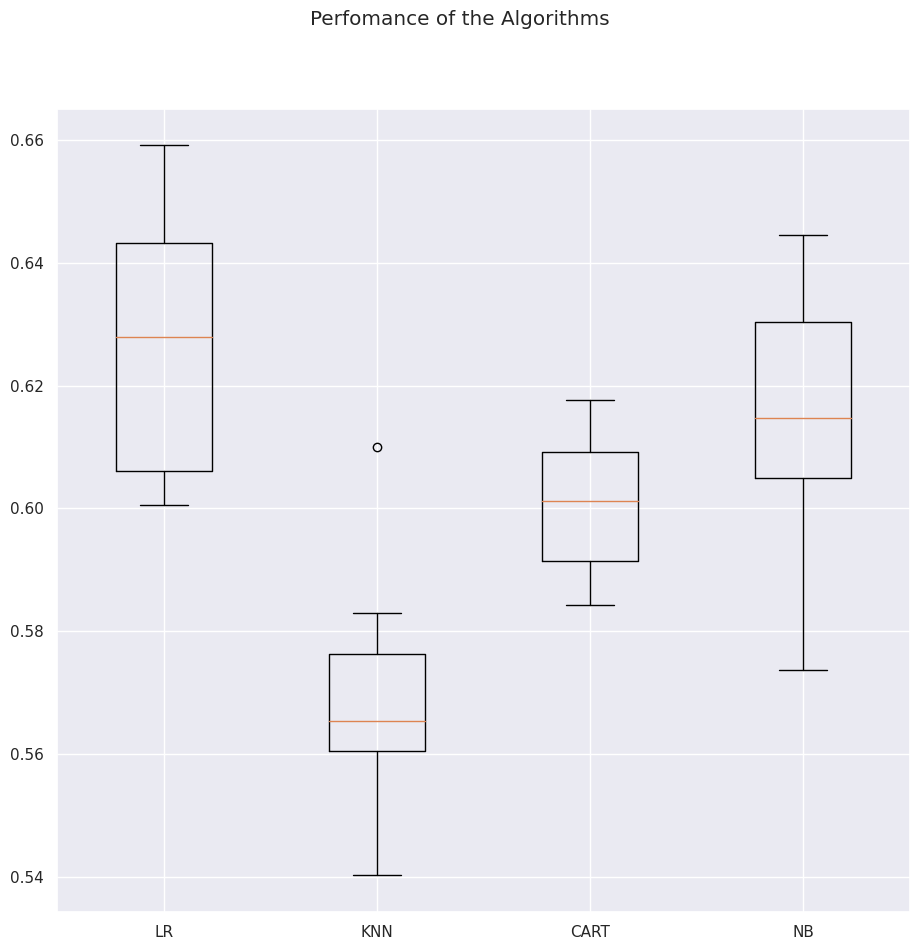

In [ ]:
# Plotting the performance of the algorithms
fig = plt.figure()
fig.suptitle('Perfomance of the Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.tight_layout(pad=3)
plt.show()

From the above graph, we see that Logistic Regression performs the best among the classification models. Next, we test the model on the test set.

In [ ]:
#Predicting on the test set
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Evaluating model performance
predictions = LR_model.predict(X_test)
# Calculating accuracy Score
print(accuracy_score(Y_test, predictions))

0.6100502512562814


The accuracy of the LR model shows satisfactory results with **61%** accuracy and is efficient in predicting the results.

[[679 347]
 [429 535]]


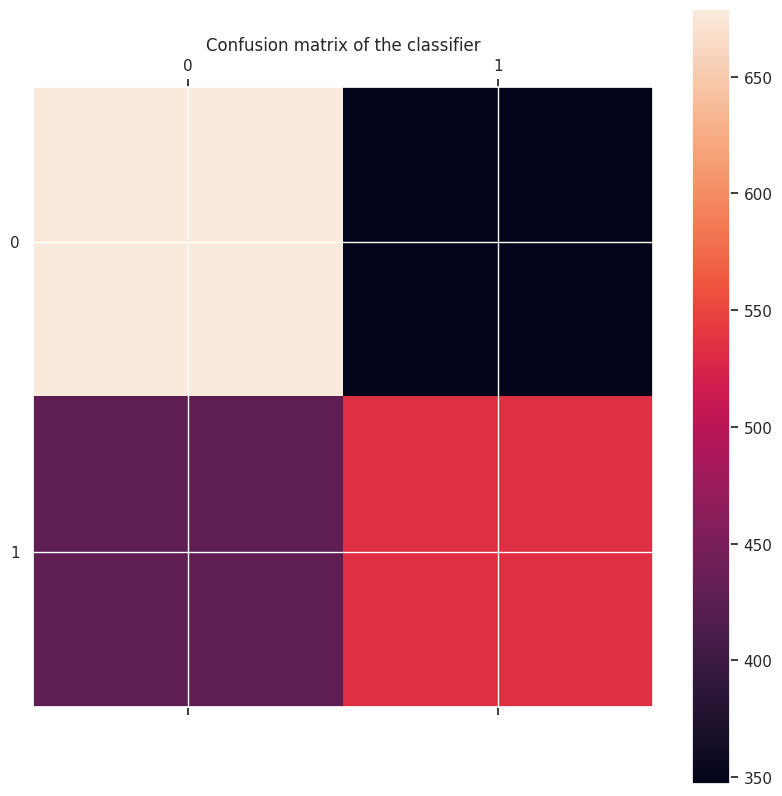

In [ ]:
# Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

The data from the confusion matrix shows that the data is imabalanced and hence other accuracy metrics needs to be chosen.

In [ ]:
# Analyzing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64      1026
           1       0.61      0.55      0.58       964

    accuracy                           0.61      1990
   macro avg       0.61      0.61      0.61      1990
weighted avg       0.61      0.61      0.61      1990



The model shows a **precision score** of **88%**, meaning that it predicts correctly 88% of the time, when the customer says 'no'. Also, a **recall** score of **1** indicates that the model correctly predicts everytime the customer says no.

### 6. Boosting Models

### 6.a. XGBOOST

In [ ]:
# Creating X array that will contain features and y array will contain the target vector
X=df8.drop('response',axis=1)
y=df8['response']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',Y_train.shape)
print('y_test',Y_test.shape)

X_train (7460, 19)
X_test (2487, 19)
y_train (7460,)
y_test (2487,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import time

# Assuming df8 is your DataFrame containing the data
X = df8.drop('response', axis=1)
y = df8['response']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

start_time = time.time()

# Building XGB model for binary classification with validation set
model_new = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='error',
                          early_stopping_rounds=4, tree_method='hist')

model_new.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

predict2 = model_new.predict(X_train)

print("Time taken by XGB: " + str((time.time() - start_time)) + " Seconds")


[0]	validation_0-error:0.35724
[1]	validation_0-error:0.35724
[2]	validation_0-error:0.35590
[3]	validation_0-error:0.35523
[4]	validation_0-error:0.35523
[5]	validation_0-error:0.35255
[6]	validation_0-error:0.35054
[7]	validation_0-error:0.35389
[8]	validation_0-error:0.35188
[9]	validation_0-error:0.35523
Time taken by XGB: 0.4043738842010498 Seconds


### 6.b. Accuracy,Sesitivity and Specificity

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Assuming df8 is your DataFrame containing the data
X = df8.drop('response', axis=1)
y = df8['response']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building XGB model for binary classification with validation set
model_new = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='error',
                          early_stopping_rounds=4, tree_method='hist')

# Add validation set using eval_set parameter
model_new.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

predict2 = model_new.predict(X_test)  # Use X_test for prediction on the test set

# Creating Confusion Matrix using the test data and the predicted value
cm = confusion_matrix(y_test, predict2)
print(cm)

# Calculating the accuracy of the predicted value on the test data
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print('Accuracy =', round(accuracy * 100, 2))

# Calculating Sensitivity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Sensitivity =', round(sensitivity * 100, 2))

# Calculating Specificity
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Specificity =', round(specificity * 100, 2))


[0]	validation_0-error:0.35223
[1]	validation_0-error:0.35344
[2]	validation_0-error:0.35424
[3]	validation_0-error:0.35304
[[969 337]
 [539 642]]
Accuracy = 64.78
Sensitivity = 74.2
Specificity = 54.36


### 6.c. Model Validation

In [ ]:
# Predicting the target using the train data features
predict3=model_new.predict(X_test)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(Y_test,predict3)
print(cm1)

# Calculating the accuracy of the train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy=',round(accuracy1*100,2))

[[969 337]
 [539 642]]
Train Accuracy= 64.78
Test Accuracy= 64.78


In [ ]:
# Analyzing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict3))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1306
           1       0.66      0.54      0.59      1181

    accuracy                           0.65      2487
   macro avg       0.65      0.64      0.64      2487
weighted avg       0.65      0.65      0.64      2487



### 7. Conclusion and Recommendations

The data shows that the following demographics have a higher subscription rate:



*   Age group: < 30 or age > 60
*   Occupation: Students or Retired people
*   Balance: > 5000 euros

Therefore, the bank will get more success on approaching customers belonging to the above categories. Also, the Logistic Regression model can be applied to know if the customer will or will not subscribe, before calling the customer. In this way, the bank can take a targeted approach and increase the efficiency in converting customers.








